# Project: Predict the Weather

The goal of this project is to predict the weather tomorrow given 23 years of historical data in Carlsbad, California (my hometown).

I will be using machine learning technqiues in order to make these predictions

Step 1: Prepare the data for machine learning

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('carlsbad_airport_weather.csv', index_col='DATE')

Get rid of missing values

In [2]:
df.apply(pd.isnull).sum()/df.shape[0]

STATION    0.000000
NAME       0.000000
AWND       0.002081
FMTM       0.689957
PGTM       0.471799
PRCP       0.000219
SNOW       0.652831
SNWD       0.638156
TAVG       0.707480
TMAX       0.001862
TMIN       0.002081
TSUN       0.885774
WDF2       0.001095
WDF5       0.004600
WSF2       0.000986
WSF5       0.003833
WT01       0.711094
WT02       0.942832
WT03       0.993867
WT08       0.750630
WT10       0.999890
dtype: float64

this above is the percentage of each column that is null

We are only looking at the core values, only selecting the 'core' values

In [3]:
core = df[['PRCP','SNOW','SNWD','TMAX','TMIN']].copy()

Rename the columns so its easy

In [4]:
core.columns = ['precip', 'snow', 'snow_depth','temp_max','temp_min']
core

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1998-04-01,0.61,NaN,NaN,56.0,44.0
1998-04-02,0.01,NaN,NaN,60.0,47.0
1998-04-03,0.04,NaN,NaN,61.0,47.0
1998-04-04,0.00,NaN,NaN,60.0,46.0
1998-04-05,0.00,NaN,NaN,61.0,47.0
...,...,...,...,...,...
2023-03-29,0.22,NaN,NaN,56.0,50.0
2023-03-30,0.38,NaN,NaN,59.0,48.0
2023-03-31,0.00,NaN,NaN,62.0,47.0


Of the core columns, how many null values do we have

In [5]:
core.apply(pd.isnull).sum()/core.shape[0]

precip        0.000219
snow          0.652831
snow_depth    0.638156
temp_max      0.001862
temp_min      0.002081
dtype: float64

In [6]:
core.snow.value_counts()

0.0    3170
Name: snow, dtype: int64

Snow is not valuable for me since it never snowed in Carlsbad

In [7]:
del core['snow']

In [8]:
del core['snow_depth']

Only select rows where precipitation is null

In [9]:
core[pd.isnull(core['precip'])]

,precip,temp_max,temp_min
DATE,,,
2003-03-27,NaN,66.0,56.0
2005-04-08,NaN,NaN,NaN


Only 8 instances of null precipitation

Replace all the null values in precip with 0

In [10]:
core['precip'] = core['precip'].fillna(0)

Deal with temperature min now

In [11]:
core[pd.isnull(core['temp_min'])]

,precip,temp_max,temp_min
DATE,,,
1998-06-17,0.0,NaN,NaN
1998-06-18,0.0,NaN,NaN
1998-08-29,0.0,NaN,NaN
1998-08-30,0.0,NaN,NaN
1999-08-23,0.0,NaN,NaN
1999-08-24,0.0,NaN,NaN
2001-03-21,0.0,NaN,NaN
2005-04-08,0.0,NaN,NaN
2006-02-04,0.0,NaN,NaN


With these small amounts, I am going to do a forward fill

In [12]:
core = core.fillna(method='ffill')

In [13]:
core.apply(pd.isnull).sum()/core.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

No missing values now

Verify that we have the correct data types

In [14]:
core.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [15]:
core.index

Index(['1998-04-01', '1998-04-02', '1998-04-03', '1998-04-04', '1998-04-05',
       '1998-04-06', '1998-04-07', '1998-04-08', '1998-04-09', '1998-04-10',
       ...
       '2023-03-24', '2023-03-25', '2023-03-26', '2023-03-27', '2023-03-28',
       '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-01', '2023-04-02'],
      dtype='object', name='DATE', length=9131)

In [16]:
core.index = pd.to_datetime(core.index)

In [17]:
core.index

DatetimeIndex(['1998-04-01', '1998-04-02', '1998-04-03', '1998-04-04',
               '1998-04-05', '1998-04-06', '1998-04-07', '1998-04-08',
               '1998-04-09', '1998-04-10',
               ...
               '2023-03-24', '2023-03-25', '2023-03-26', '2023-03-27',
               '2023-03-28', '2023-03-29', '2023-03-30', '2023-03-31',
               '2023-04-01', '2023-04-02'],
              dtype='datetime64[ns]', name='DATE', length=9131, freq=None)

Convert it to datetime was done above

999's in a field mean that the column is having some missing fields, need to confirm there is none in our data 

In [18]:
core.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

We are good

Analyzing our weather data

<AxesSubplot:xlabel='DATE'>

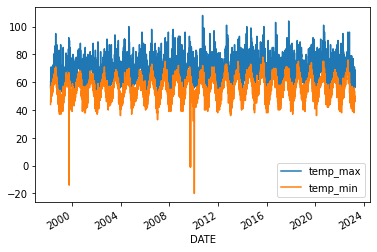

In [19]:
core[['temp_max', 'temp_min']].plot()

Plot data out to confirm nothing was weird with it

<AxesSubplot:xlabel='DATE'>

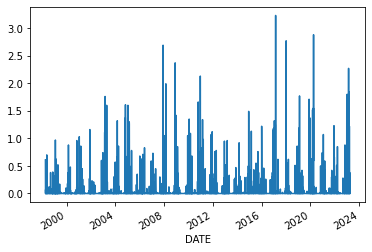

In [20]:
core['precip'].plot()

In [21]:
core.groupby(core.index.year).sum()['precip']

DATE
1998     5.54
1999     5.76
2000     6.79
2001     9.27
2002     4.09
2003    10.47
2004    12.03
2005    14.65
2006     8.27
2007     8.22
2008    14.59
2009     5.90
2010    20.45
2011    11.68
2012     8.04
2013     5.24
2014     7.60
2015     7.56
2016    11.66
2017    10.55
2018     9.41
2019    18.52
2020    14.16
2021     8.93
2022     5.96
2023    17.41
Name: precip, dtype: float64

This above tells us how much it rained each year

Train our first machine learning model

What do we want to predict?

Tomorrow's maximum tempurate using historical data

Need to create a target, this is what we are trying to predict

In [22]:
core['target'] = core.shift(-1)['temp_max']

In [23]:
core

,precip,temp_max,temp_min,target
DATE,,,,
1998-04-01,0.61,56.0,44.0,60.0
1998-04-02,0.01,60.0,47.0,61.0
1998-04-03,0.04,61.0,47.0,60.0
1998-04-04,0.00,60.0,46.0,61.0
1998-04-05,0.00,61.0,47.0,61.0
...,...,...,...,...
2023-03-29,0.22,56.0,50.0,59.0
2023-03-30,0.38,59.0,48.0,62.0
2023-03-31,0.00,62.0,47.0,63.0


Last row in dataframe will inherently have a missing value, will get rid of it

In [24]:
core = core.iloc[:-1,:].copy()

In [25]:
core

,precip,temp_max,temp_min,target
DATE,,,,
1998-04-01,0.61,56.0,44.0,60.0
1998-04-02,0.01,60.0,47.0,61.0
1998-04-03,0.04,61.0,47.0,60.0
1998-04-04,0.00,60.0,46.0,61.0
1998-04-05,0.00,61.0,47.0,61.0
...,...,...,...,...
2023-03-28,0.00,66.0,49.0,56.0
2023-03-29,0.22,56.0,50.0,59.0
2023-03-30,0.38,59.0,48.0,62.0


In [26]:
from sklearn.linear_model import Ridge 

reg = Ridge(alpha=.1)

In [27]:
predictors = ['precip', 'temp_max', 'temp_min']

In [28]:
train = core.loc[:'2022-12-31']
test = core.loc['2022-12-31':]

Train is all the dates before December 31, 2022
Test is all the dates after December 31, 2022

In [29]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [30]:
predictions = reg.predict(test[predictors])

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
mean_absolute_error(test['target'], predictions)

3.236250221274064

This means we are on average 3.2 degrees off the actual temperature

Evaluating our model

combine our actual values vs our predicted values. Helps us see if there was something we are missing

In [33]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)

In [34]:
combined.columns = ['actual', 'predictions']

<AxesSubplot:xlabel='DATE'>

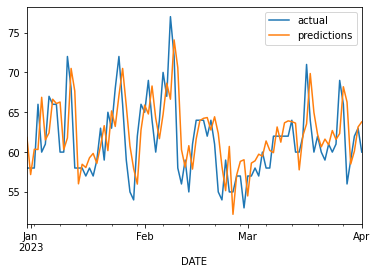

In [35]:
combined.plot()

In [36]:
reg.coef_

array([-2.4373081 ,  0.73469772,  0.09545649])

This means that precip has negative impact on temp_max of -2.437

Creating a function to make predictions

In [37]:
def create_predictions(predictors, core, reg):
    train = core.loc[:'2022-12-31']
    test = core.loc['2022-12-31':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    return error, combined 
    
    

Create more predictors

Rolling average temperature is for the 30 days prior find the average and assign to month_max in that row

In [38]:
core['30 day average max'] = core['temp_max'].rolling(30).mean()

In [39]:
core

,precip,temp_max,temp_min,target,30 day average max
DATE,,,,,
1998-04-01,0.61,56.0,44.0,60.0,NaN
1998-04-02,0.01,60.0,47.0,61.0,NaN
1998-04-03,0.04,61.0,47.0,60.0,NaN
1998-04-04,0.00,60.0,46.0,61.0,NaN
1998-04-05,0.00,61.0,47.0,61.0,NaN
...,...,...,...,...,...
2023-03-28,0.00,66.0,49.0,56.0,60.700000
2023-03-29,0.22,56.0,50.0,59.0,60.666667
2023-03-30,0.38,59.0,48.0,62.0,60.733333


In [40]:
core['above 30 day average max'] = core['30 day average max'] / core['temp_max']

This will give us the ratio between how much the rolling average is above or below our daily max temperature

In [41]:
core['max_min_ratio'] = core['temp_max'] / core['temp_min']

This gives us the ratio of the max temperature on the day vs the min temperature on the day

Adding our new predictors to our exisitng ones

In [42]:
predictors = ['precip', 'temp_max', 'temp_min', '30 day average max', 'above 30 day average max','max_min_ratio']

Before running the function, need to remove the first 30 rows since there will be NaN values

In [43]:
core = core.iloc[30:,:].copy()

In [44]:
error, combined = create_predictions(predictors, core, reg)

In [45]:
error

3.125330940044044

Reduced error slightly, now 3.1 vs 3.2 prior

<AxesSubplot:xlabel='DATE'>

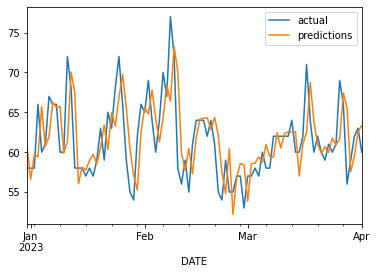

In [46]:
combined.plot()

Adding more specific predictors

In [47]:
core['monthly_avg'] = core['temp_max'].groupby(core.index.month).apply(lambda x: x.expanding(1).mean())

this only takes previous rows to calculate the monthly average temperature

In [48]:
core

,precip,temp_max,temp_min,target,30 day average max,above 30 day average max,max_min_ratio,monthly_avg
DATE,,,,,,,,
1998-05-01,0.00,66.0,56.0,70.0,63.966667,0.969192,1.178571,66.000000
1998-05-02,0.00,70.0,56.0,69.0,64.300000,0.918571,1.250000,68.000000
1998-05-03,0.00,69.0,59.0,70.0,64.566667,0.935749,1.169492,68.333333
1998-05-04,0.09,70.0,58.0,66.0,64.900000,0.927143,1.206897,68.750000
1998-05-05,0.17,66.0,58.0,67.0,65.066667,0.985859,1.137931,68.200000
...,...,...,...,...,...,...,...,...
2023-03-28,0.00,66.0,49.0,56.0,60.700000,0.919697,1.346939,64.567358
2023-03-29,0.22,56.0,50.0,59.0,60.666667,1.083333,1.120000,64.556274
2023-03-30,0.38,59.0,48.0,62.0,60.733333,1.029379,1.229167,64.549096


In [49]:
core['day_of_year_avg'] = core['temp_max'].groupby(core.index.day_of_year).apply(lambda x: x.expanding(1).mean())

This gives us the average temperature of that day in the year

Update the predictors

In [50]:
predictors = ['precip', 'temp_max', 'temp_min', '30 day average max', 'above 30 day average max','max_min_ratio', 'day_of_year_avg', 'monthly_avg']

In [51]:
error, combined = create_predictions(predictors, core, reg)

In [52]:
error

3.194412950894392

This actually made things worse, 3.19 now vs 3.12 prior

Lets see which variables are being used vs which ones not

In [53]:
predictors

['precip',
 'temp_max',
 'temp_min',
 '30 day average max',
 'above 30 day average max',
 'max_min_ratio',
 'day_of_year_avg',
 'monthly_avg']

In [54]:
reg.coef_

array([-2.08937777,  0.55728144, -0.03081455,  0.19272553, -9.96034226,
        0.05613604,  0.05957828,  0.20939596])

Lets see what is corr now to see if the predictors that we are passing in are actually making sense

In [55]:
core.corr()['target']

precip                     -0.213685
temp_max                    0.807201
temp_min                    0.564734
target                      1.000000
30 day average max          0.586475
above 30 day average max   -0.527511
max_min_ratio              -0.015780
monthly_avg                 0.587829
day_of_year_avg             0.630520
Name: target, dtype: float64

look at the differences in absolute terms of actual vs predictions

In [56]:
combined['diff'] = (combined['actual'] - combined['predictions']).abs()

In [57]:
combined['diff'].sort_values(ascending=False).head()

DATE
2023-02-10    12.227517
2023-02-08    10.142716
2023-01-11    10.048776
2023-03-28     9.987523
2023-01-13     9.815444
Name: diff, dtype: float64

These are the biggest errors of the predictions

In [58]:
Why did this happen? Am i missing something?

Object `something` not found.


In [ ]:
Why did this happen? Am i missing something

Lot more next steps:

- Predict weather for entire week vs just today
- predict weather using another weather station
- use more predictors
- create more predictors 
- try different algorithms
- create predictions for many different years